In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Spain') 
race = ff1.get_session(2023, 'Spain', 'R')
race.load()
race_laps = race.laps
stint = 2

race_laps['LapTimeSeconds'] = race_laps['LapTime'].dt.total_seconds()
race_laps = race_laps.loc[(race_laps['PitOutTime'].isnull() & race_laps['PitInTime'].isnull()) ]
#& race_laps['LapNumber'].between(11, 58, inclusive = True)
race_laps = race_laps.loc[((race_laps['Driver'] == "LEC")  & (race_laps['IsAccurate']==True)) |
                          ((race_laps['Driver'] == "PER")  & (race_laps['IsAccurate']==True)) ] 
race_laps.drop(race_laps.columns.difference(['DriverNumber','LapTimeSeconds', "LapNumber"]), 1, inplace=True)

In [ ]:
driver1 = "LEC"
driver2 = "VER"
race_laps_driver1 = race_laps[race_laps['DriverNumber'].astype(int) == 16]
race_laps_driver2 = race_laps[race_laps['DriverNumber'].astype(int) == 11]
race_laps_driver1["Driver"] = driver1
race_laps_driver2["Driver"] = driver2
#Missing values?

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 16]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 16]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 17]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 17]

race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 41]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 41]
race_laps_driver1 = race_laps_driver1[race_laps_driver1.LapNumber != 42]
race_laps_driver2 = race_laps_driver2[race_laps_driver2.LapNumber != 42]

In [10]:
race_laps_driver1 = race_laps_driver1.loc[:,["LapNumber", "LapTimeSeconds"]]
race_laps_driver2 = race_laps_driver2.loc[:,["LapNumber", "LapTimeSeconds"]]
dict_time_driver1=dict(zip(race_laps_driver1.LapNumber, race_laps_driver1.LapTimeSeconds))
dict_time_driver2=dict(zip(race_laps_driver2.LapNumber, race_laps_driver2.LapTimeSeconds))
diff_dict = {key: (dict_time_driver2[key] - dict_time_driver1.get(key, 0)) for key in dict_time_driver2}
# Leclerc - Verstappen
# Se istogramma verso il basso -> Verstappen giro migliore di Leclerc

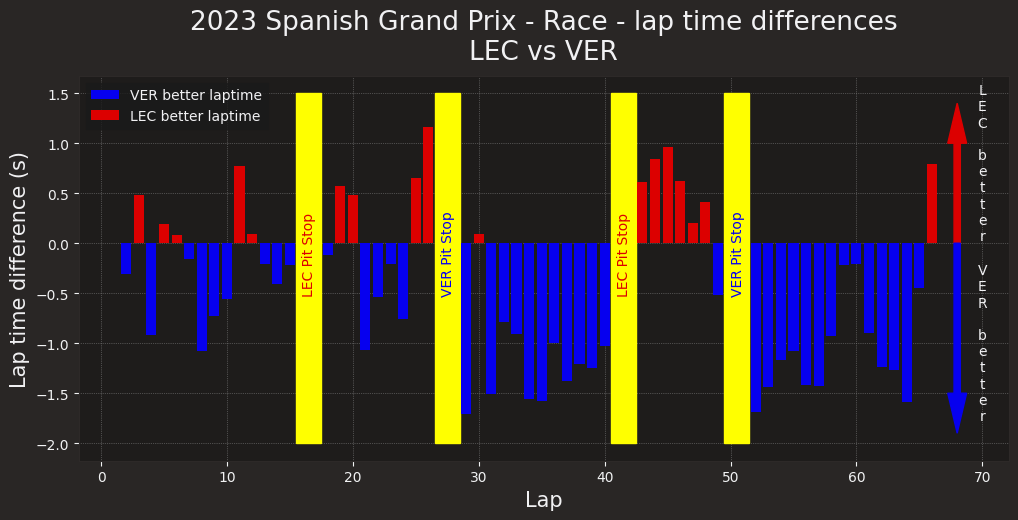

In [56]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(12,5))
mask1 = dict((k, v) for k, v in diff_dict.items() if v <= 0)
mask2 = dict((k, v) for k, v in diff_dict.items() if v > 0)
plt.title(f"{race.event.year} {race.event.EventName} - {race.name} - lap time differences\n{driver1} vs {driver2}")
plt.xlabel("Lap", fontsize=15)
plt.ylabel("Lap time difference (s)", fontsize=15)
plt.grid(color="grey", linestyle=":", linewidth=0.5)
ax = plt.gca()
ax.add_patch(Rectangle((15.5, -2), 2, 3.5, color='yellow'))
ax.add_patch(Rectangle((26.5, -2), 2, 3.5, color='yellow'))
ax.add_patch(Rectangle((40.5, -2), 2, 3.5, color='yellow'))
ax.add_patch(Rectangle((49.5, -2), 2, 3.5, color='yellow'))
ax.text(16, -0.5, "LEC Pit Stop", color=ff1.plotting.team_color("Ferrari"), rotation=90)
ax.text(41, -0.5, "LEC Pit Stop", color=ff1.plotting.team_color("Ferrari"), rotation=90)
ax.text(27, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90)
ax.text(50, -0.5, "VER Pit Stop", color=ff1.plotting.team_color("Red Bull"), rotation=90)
plt.text(70, 0.8, '\n'.join("LEC better"), va='center', ha='center')
plt.text(70, -1, '\n'.join("VER better"), va='center', ha='center')
plt.arrow(68, 0, 0, 1, width=0.5, head_length=0.4, color=ff1.plotting.team_color("Ferrari"))
plt.arrow(68, 0, 0, -1.5, width=0.5, head_length=0.4, color=ff1.plotting.team_color("Red Bull"))
plt.bar(list(mask1.keys()), list(mask1.values()), color = ff1.plotting.team_color("Red Bull"), width=0.8, label = "VER better laptime")
plt.bar(list(mask2.keys()), list(mask2.values()), color = ff1.plotting.team_color("Ferrari"), width=0.8, label = "LEC better laptime")
plt.legend()